In [1]:
## Preliminary

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from collections import Counter
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV

!pip install mitosheet 
import mitosheet 

!pip install xgboost
import xgboost

%config InlineBackend.figure_format = "svg"

In [3]:
df = pd.read_csv('../datasets/train.csv')

In [4]:
df.head()

,property_id,property_name,property_summary,property_space,property_desc,property_neighborhood,property_notes,property_transit,property_access,property_interaction,...,reviews_rating,reviews_acc,reviews_cleanliness,reviews_checkin,reviews_communication,reviews_location,reviews_value,reviews_per_month,extra,target
0,1,"Chambre à louer,courte durée.","Je loue une chambre dans mon appartement ""atyp...","Espace duplex très grand et lumineux,la chambr...","Je loue une chambre dans mon appartement ""atyp...",NaN,NaN,Accès direct de la Gare du Nord ( 4 arrêts de...,NaN,Je suis entièrement disponible pour tout échan...,...,97.0,10.0,9.0,10.0,10.0,9.0,10.0,1.31,Host Has Profile Pic,26
1,2,Urban Antwerp - Spacious & Authentic Herenhouse,Our place is a typical historic herenhuis clos...,The spaces in our house are all large with hig...,Our place is a typical historic herenhuis clos...,Bar and restaurants One of our favourite bars ...,NaN,In Antwerp we have the system with rental bike...,You will be able to access the following space...,We are always available to help and assist whe...,...,100.0,10.0,10.0,10.0,10.0,8.0,10.0,1.00,"Host Has Profile Pic, Is Location Exact",75
2,3,comfortable apartment in friendly neighborhood,Nice and cozy apartment for couples who like t...,Nice proper and clean apartment. No personal s...,Nice and cozy apartment for couples who like t...,Op 5 minuten lopen zijn er 2 gezellig stadpark...,Public transport is next to the apartment and ...,Fiets verhuur voor de deur. (dag/weekkaart) vi...,As a good host I trust my guest. No secrets an...,"Ik ben altijd bereikbaar voor vragen, maar ben...",...,93.0,10.0,10.0,9.0,9.0,9.0,10.0,0.75,"Host Has Profile Pic, Is Location Exact, Insta...",110
3,4,Historical City Antwerp.,The best place to stay if you like to be in th...,Our rooms are nice and spacious. You stay in a...,The best place to stay if you like to be in th...,In the middle of the historical city of Antwerp,Staying in our house you have to be able to cl...,Tram 10 and 11 from Central station stop in ou...,Beside your own room you can relax in the down...,We will be available to let you know where wha...,...,98.0,10.0,10.0,10.0,10.0,10.0,10.0,6.90,"Host Is Superhost, Host Has Profile Pic, Host ...",60
4,5,Antwerp center city,Our place is right in the heart of the histori...,It is situated in the center if the old town. ...,Our place is right in the heart of the histori...,The neighborhood is in the historical part of ...,NaN,The easiest is just to walk into the city ther...,You will enter the house through the Downstair...,I will be present to help you out with any kin...,...,97.0,10.0,10.0,10.0,10.0,10.0,10.0,4.16,"Host Is Superhost, Host Has Profile Pic, Host ...",55


In [5]:
# First, we eliminate irrelevant columns and columns with too many missing values

In [6]:
# Deleted columns property_id
df.drop(['property_id'], axis=1, inplace=True)

# Deleted columns property_name
df.drop(['property_name'], axis=1, inplace=True)

# Deleted columns property_summary
df.drop(['property_summary'], axis=1, inplace=True)

# Deleted columns property_space
df.drop(['property_space'], axis=1, inplace=True)

# Deleted columns property_desc
df.drop(['property_desc'], axis=1, inplace=True)

# Deleted columns property_neighborhood
df.drop(['property_neighborhood'], axis=1, inplace=True)

# Deleted columns property_notes
df.drop(['property_notes'], axis=1, inplace=True)

# Deleted columns property_transit
df.drop(['property_transit'], axis=1, inplace=True)

# Deleted columns property_access
df.drop(['property_access'], axis=1, inplace=True)

# Deleted columns property_interaction
df.drop(['property_interaction'], axis=1, inplace=True)

# Deleted columns property_rules
df.drop(['property_rules'], axis=1, inplace=True)

# Deleted columns property_sqfeet
df.drop(['property_sqfeet'], axis=1, inplace=True)

# Deleted columns property_scraped_at
df.drop(['property_scraped_at'], axis=1, inplace=True)

# Deleted columns property_last_updated
df.drop(['property_last_updated'], axis=1, inplace=True)

# Deleted columns host_id
df.drop(['host_id'], axis=1, inplace=True)

# Deleted columns host_location
df.drop(['host_location'], axis=1, inplace=True)

# Deleted columns host_about
df.drop(['host_about'], axis=1, inplace=True)

# Deleted columns host_nr_listings_total
df.drop(['host_nr_listings_total'], axis=1, inplace=True)

# Deleted columns host_verified
df.drop(['host_verified'], axis=1, inplace=True)

# Deleted columns booking_max_nights
df.drop(['booking_max_nights'], axis=1, inplace=True)

# Deleted columns reviews_first
df.drop(['reviews_first'], axis=1, inplace=True)

# Deleted columns reviews_last
df.drop(['reviews_last'], axis=1, inplace=True)

In [7]:
df.describe()

,property_lat,property_lon,property_max_guests,property_bathrooms,property_bedrooms,property_beds,host_response_rate,host_nr_listings,booking_price_covers,booking_min_nights,...,reviews_num,reviews_rating,reviews_acc,reviews_cleanliness,reviews_checkin,reviews_communication,reviews_location,reviews_value,reviews_per_month,target
count,6495.000000,6495.000000,6495.000000,6483.000000,6486.000000,6484.000000,5034.000000,6494.000000,6495.000000,6495.000000,...,6495.000000,5112.000000,5096.000000,5098.000000,5094.000000,5099.000000,5092.000000,5090.000000,5205.000000,6495.000000
mean,50.902186,4.372070,2.999076,1.141293,1.205982,1.742751,92.061581,6.095935,1.432333,3.531948,...,18.989069,91.692879,9.469388,9.211652,9.608952,9.621298,9.241359,9.246169,1.667712,67.899923
std,0.142571,0.031946,1.778460,0.456293,0.750513,1.339657,19.462788,36.866072,0.965370,16.569408,...,36.851232,8.999618,0.873919,1.099755,0.809941,0.804036,0.897887,0.933277,1.992615,51.910478
min,50.769144,4.268333,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.010000,10.000000
25%,50.828595,4.347677,2.000000,1.000000,1.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,0.310000,40.000000
50%,50.843198,4.367556,2.000000,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,2.000000,...,5.000000,93.000000,10.000000,10.000000,10.000000,10.000000,9.000000,9.000000,0.910000,55.000000
75%,50.859380,4.395064,4.000000,1.000000,1.000000,2.000000,100.000000,2.000000,2.000000,3.000000,...,19.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.270000,80.000000
max,51.360545,4.483468,16.000000,8.000000,8.000000,16.000000,100.000000,591.000000,16.000000,1000.000000,...,386.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,19.900000,950.000000


In [8]:
df.head()

,property_zipcode,property_lat,property_lon,property_type,property_room_type,property_max_guests,property_bathrooms,property_bedrooms,property_beds,property_bed_type,...,reviews_rating,reviews_acc,reviews_cleanliness,reviews_checkin,reviews_communication,reviews_location,reviews_value,reviews_per_month,extra,target
0,NaN,50.858451,4.376594,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,...,97.0,10.0,9.0,10.0,10.0,9.0,10.0,1.31,Host Has Profile Pic,26
1,2600,51.194744,4.413748,House,Entire home/apt,4,1.5,2.0,2.0,Real Bed,...,100.0,10.0,10.0,10.0,10.0,8.0,10.0,1.00,"Host Has Profile Pic, Is Location Exact",75
2,2018,51.192501,4.409351,Condominium,Entire home/apt,2,1.0,1.0,1.0,Real Bed,...,93.0,10.0,10.0,9.0,9.0,9.0,10.0,0.75,"Host Has Profile Pic, Is Location Exact, Insta...",110
3,2000,51.220145,4.405446,House,Private room,2,1.0,1.0,1.0,Real Bed,...,98.0,10.0,10.0,10.0,10.0,10.0,10.0,6.90,"Host Is Superhost, Host Has Profile Pic, Host ...",60
4,2000,51.222028,4.404945,House,Private room,2,1.0,1.0,1.0,Real Bed,...,97.0,10.0,10.0,10.0,10.0,10.0,10.0,4.16,"Host Is Superhost, Host Has Profile Pic, Host ...",55


In [9]:
# target

In [10]:
print("Number of NaN values in the target column: ", df['target'].isnull().sum())

Number of NaN values in the target column:  0


In [11]:
# Transform target to logarithm (target)
df['target'] = np.log(df['target'])

In [12]:
# Remove target outliers
Q1_target = df['target'].quantile(0.25)
Q3_target = df['target'].quantile(0.75)
IQR_target = Q3_target - Q1_target

lower_bound_target = Q1_target - 1.5 * IQR_target
upper_bound_target = Q3_target + 1.5 * IQR_target

df = df[(df['target'] >= lower_bound_target) & (df['target'] <= upper_bound_target)]

In [13]:
df.describe()

,property_lat,property_lon,property_max_guests,property_bathrooms,property_bedrooms,property_beds,host_response_rate,host_nr_listings,booking_price_covers,booking_min_nights,...,reviews_num,reviews_rating,reviews_acc,reviews_cleanliness,reviews_checkin,reviews_communication,reviews_location,reviews_value,reviews_per_month,target
count,6379.000000,6379.000000,6379.000000,6367.000000,6370.000000,6368.000000,4944.000000,6378.000000,6379.000000,6379.000000,...,6379.000000,5019.000000,5003.000000,5005.000000,5001.000000,5006.000000,4999.000000,4997.000000,5112.000000,6379.000000
mean,50.902223,4.372136,2.996394,1.141197,1.206907,1.740578,91.998786,6.110223,1.431102,3.518890,...,19.012228,91.663678,9.465721,9.208192,9.607279,9.619457,9.237047,9.243146,1.662829,4.020742
std,0.142607,0.031954,1.780654,0.457005,0.751750,1.340870,19.577915,37.137656,0.961999,16.663561,...,36.900315,9.014429,0.876964,1.100928,0.813719,0.808307,0.898411,0.934138,1.988918,0.514195
min,50.769144,4.268333,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.010000,2.708050
25%,50.828597,4.347725,2.000000,1.000000,1.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,0.310000,3.688879
50%,50.843188,4.367726,2.000000,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,2.000000,...,5.000000,93.000000,10.000000,10.000000,10.000000,10.000000,9.000000,9.000000,0.910000,4.007333
75%,50.859410,4.395146,4.000000,1.000000,1.000000,2.000000,100.000000,2.000000,2.000000,3.000000,...,19.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.260000,4.369448
max,51.360545,4.483468,16.000000,8.000000,8.000000,16.000000,100.000000,591.000000,16.000000,1000.000000,...,386.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,19.900000,5.416100


In [14]:
# property_zipcode

In [15]:
# EDA says no significant difference between prices in Brussels or Antwerp, so we remove it 

In [16]:
# Deleted columns property_zipcode
df.drop(['property_zipcode'], axis=1, inplace=True)

In [17]:
# property_lat and property_lon

In [18]:
# EDA suggests to skip so, even distance is not cool to work with

In [19]:
# Deleted columns property_zipcode
df.drop(['property_lat'], axis=1, inplace=True)
df.drop(['property_lon'], axis=1, inplace=True)

In [20]:
# property_type

In [21]:
df.drop(['property_type'], axis=1, inplace=True)

In [22]:
# property_room_type

In [23]:
df.drop(['property_room_type'], axis=1, inplace=True)

In [24]:
# property_max_guests

In [25]:
print("Number of NaN values in the property_max_guests column: ", df['property_max_guests'].isnull().sum())

Number of NaN values in the property_max_guests column:  0


In [26]:
# Remove property_max_guests outliers
Q1_guests = df['property_max_guests'].quantile(0.25)
Q3_guests = df['property_max_guests'].quantile(0.75)
IQR_guests = Q3_guests - Q1_guests

lower_bound_guests = Q1_guests - 1.5 * IQR_guests
upper_bound_guests = Q3_guests + 1.5 * IQR_guests

df = df[(df['property_max_guests'] >= lower_bound_guests) & (df['property_max_guests'] <= upper_bound_guests)]

In [27]:
# property_bathrooms

In [28]:
# weird correlation so let's remove it

In [29]:
df.drop(['property_bathrooms'], axis=1, inplace=True)

In [30]:
# property_bedrooms

In [31]:
df.drop(['property_bedrooms'], axis=1, inplace=True)

In [32]:
# property_beds

In [33]:
df.drop(['property_beds'], axis=1, inplace=True)

In [34]:
# property_bed_type

In [35]:
# almost all real_beds so remove

In [36]:
df.drop(['property_bed_type'], axis=1, inplace=True)

In [37]:
# property_amenities

In [38]:
# Check for missing values
df['property_amenities'].isna().sum()

52

In [39]:
# Drop entires with missing values for property_amenities
df.dropna(subset=['property_amenities'], inplace=True)

In [40]:
# make a dictionary from the amenities
amenities_counter = Counter()

# delete {},"",/,\, and split them by comma
df['property_amenities'].astype('str').str.strip('{}')\
                                       .str.replace('"', '')\
                                       .str.lstrip('\"')\
                                       .str.rstrip('\"')\
                                       .str.split(',')\
                                       .apply(amenities_counter.update)

# check how many amenities we have in total
print(len(amenities_counter))

# create a new dictionary without amenities containing "translation missing"
amenities_counter_cleaned = {k: v for k, v in amenities_counter.items() if "translation missing" not in k}

# update
amenities_counter.update(amenities_counter_cleaned)

120


In [41]:
# create dummy columns
for item,_ in amenities_counter.most_common(30):
    if 'translation missing' in item:
        continue
    col_name = 'amenity_' + item.replace(" ", "_")
    df[col_name] = df['property_amenities'].astype('str').apply(lambda x: int(item in x))

In [42]:
# remove original property_amenities column
df.drop(['property_amenities'], axis=1, inplace=True)

In [43]:
# host_since

In [44]:
# Check for missing values
df['host_since'].isna().sum()

1

In [45]:
# Fill in missing values
from datetime import date
today = date.today()
df.fillna({'host_since': today}, inplace=True)

In [46]:
# Create a new column 'days_since_host' with the number of days since the host's first registered listing
df['days_since_host'] = (pd.to_datetime('today') - pd.to_datetime(df['host_since'])).dt.days

In [47]:
# Remove days_since_host outliers
Q1_dayshost = df['days_since_host'].quantile(0.25)
Q3_dayshost = df['days_since_host'].quantile(0.75)
IQR_dayshost = Q3_dayshost - Q1_dayshost

lower_bound_dayshost = Q1_dayshost - 1.5 * IQR_dayshost
upper_bound_dayshost = Q3_dayshost + 1.5 * IQR_dayshost

df = df[(df['days_since_host'] >= lower_bound_dayshost) & (df['days_since_host'] <= upper_bound_dayshost)]

In [48]:
df.drop(['host_since'], axis=1, inplace=True)

In [49]:
# host_response_time

In [50]:
df.drop(['host_response_time'], axis=1, inplace=True)

In [51]:
# host_response_rate

In [52]:
# Create a new column for binned host response rate
df['binned_host_response_rate'] = df['host_response_rate'].apply(lambda x: '1' if x == 100 else '0')

In [53]:
df.drop(['host_response_rate'], axis=1, inplace=True)

In [54]:
# host_nr_listings

In [55]:
df.drop(['host_nr_listings'], axis=1, inplace=True)

In [56]:
# booking_min_nights

In [57]:
df.drop(['booking_min_nights'], axis=1, inplace=True)

In [58]:
# booking_availability

In [59]:
df.drop(['booking_availability_60'], axis=1, inplace=True)
df.drop(['booking_availability_90'], axis=1, inplace=True)
df.drop(['booking_availability_365'], axis=1, inplace=True)

In [60]:
# booking_cancel_policy

In [61]:
df = df[df['booking_cancel_policy'] != 'super_strict_30']

In [62]:
# Create dummies
dummies_df = pd.get_dummies(df['booking_cancel_policy'], prefix='bc')
df = pd.concat([df.drop('booking_cancel_policy', axis=1), dummies_df], axis=1)

In [63]:
# reviews_num

In [64]:
df.drop(['reviews_num'], axis=1, inplace=True)

In [65]:
# reviews_rating

In [66]:
bins_reviews = [-np.inf, 94, 100, np.inf]
labels = ['not perfect', 'perfect', 'no review']
df['reviews_rating'] = pd.cut(df['reviews_rating'], bins=bins_reviews, labels=labels)
df['reviews_rating'] = df['reviews_rating'].fillna('no review')

In [67]:
df = pd.get_dummies(df, columns=['reviews_rating'], prefix='', prefix_sep='')

In [68]:
# reviews_per_month

In [69]:
df.drop(['reviews_per_month'], axis=1, inplace=True)

In [70]:
# extra
df.drop(['extra'], axis=1, inplace=True)

In [71]:
# to be fixed

In [79]:
# import train_test_split function
from sklearn.model_selection import train_test_split
# import metrics
from sklearn.metrics import mean_squared_error, r2_score

# create target and features
a = df.drop(['target'], axis = 1)
b = df.target

# split our data
X_train, X_test, y_train, y_test = train_test_split(a, b, test_size=0.2, random_state=13)

In [80]:
# scale data and normalize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [81]:
# Count NaN values per attribute in df
df.drop(['reviews_acc'], axis=1, inplace=True)
df.drop(['reviews_cleanliness'], axis=1, inplace=True)
df.drop(['reviews_checkin'], axis=1, inplace=True)
df.drop(['reviews_communication'], axis=1, inplace=True)
df.drop(['reviews_location'], axis=1, inplace=True)
df.drop(['reviews_value'], axis=1, inplace=True)

KeyError: "['reviews_acc'] not found in axis"

In [82]:
from sklearn import linear_model
from sklearn import metrics

# linear regression testing
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
r2_lr = metrics.r2_score(y_test, reg.predict(X_test))

y_test_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)

print (f"r2: {round(r2_lr, 5)}")

r2: -0.00494


In [83]:
# ridge model testing
ridge = linear_model.Ridge()
ridge.fit(X_train, y_train)
r2_rr = metrics.r2_score(y_test, ridge.predict(X_test))

y_test_pred = ridge.predict(X_test)
y_train_pred = ridge.predict(X_train)

print (f"r2: {round(r2_rr, 5)}")

r2: -0.00495


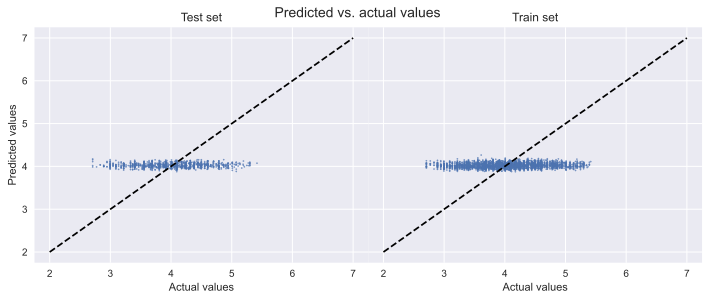

In [84]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Predicted vs. actual values', fontsize=14, y=1)
plt.subplots_adjust(top=0.93, wspace=0)
    
ax1.scatter(y_test, y_test_pred, s=2, alpha=0.7)
ax1.plot(list(range(2,8)), list(range(2,8)), color='black', linestyle='--')
ax1.set_title('Test set')
ax1.set_xlabel('Actual values')
ax1.set_ylabel('Predicted values')
    
ax2.scatter(y_train, y_train_pred, s=2, alpha=0.7)
ax2.plot(list(range(2,8)), list(range(2,8)), color='black', linestyle='--')
ax2.set_title('Train set')
ax2.set_xlabel('Actual values')
ax2.set_ylabel('')
ax2.set_yticklabels(labels='')

plt.show()

In [85]:
import xgboost as xgb
# create a baseline
booster = xgb.XGBRegressor()

In [86]:
from sklearn.model_selection import GridSearchCV

# create Grid of parameters
param_grid = {'n_estimators': [100, 150, 200],
              'learning_rate': [0.01, 0.05, 0.1], 
              'max_depth': [3, 4, 5, 6, 7],
              'colsample_bytree': [0.6, 0.7, 1],
              'gamma': [0.0, 0.1, 0.2]}

# instantiate the tuned random forest
booster_grid_search = GridSearchCV(booster, param_grid, cv=3, n_jobs=-1)

# train the tuned random forest
booster_grid_search.fit(X_train, y_train)

# print best estimator parameters found during the grid search
print(booster_grid_search.best_params_)

{'colsample_bytree': 0.6, 'gamma': 0.2, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}


In [87]:
# instantiate xgboost with the most optimal parameters
booster = xgb.XGBRegressor(colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, 
                           max_depth=7, n_estimators=100, random_state=4)

# train the model
booster.fit(X_train, y_train)

# predict the values
y_pred_train = booster.predict(X_train)
y_pred_test = booster.predict(X_test)

In [88]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"RMSE: {round(RMSE, 5)}")

RMSE: 0.51699


In [89]:
r2 = r2_score(y_test, y_pred_test)
r2
print(f"r2: {round(r2, 5)}")

r2: 0.01432


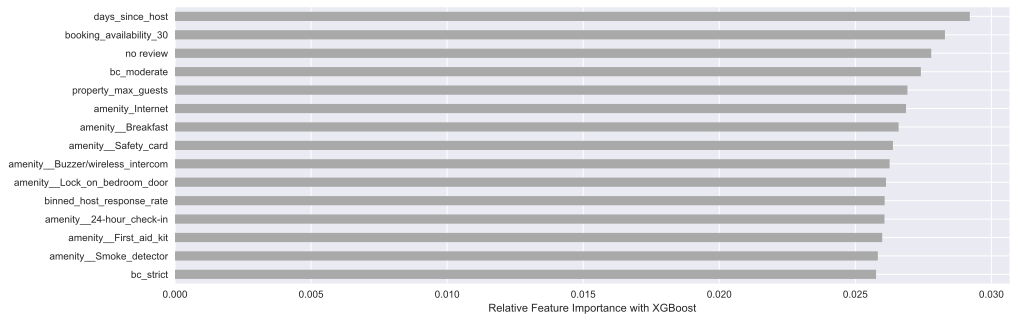

In [90]:
# plot the important features
features_importance = pd.Series(booster.feature_importances_, index=a.columns)
features_importance.nlargest(15).sort_values().plot(kind='barh', color='darkgrey', figsize=(15,5))
plt.xlabel('Relative Feature Importance with XGBoost');

In [ ]:
## Oke nu laden we de test set en doen we alles idem

In [ ]:
test = pd.read_csv('../datasets/test.csv')

In [ ]:
test.head()

In [ ]:
# Deleted columns property_id
test.drop(['property_id'], axis=1, inplace=True)

# Deleted columns property_name
test.drop(['property_name'], axis=1, inplace=True)

# Deleted columns property_summary
test.drop(['property_summary'], axis=1, inplace=True)

# Deleted columns property_space
test.drop(['property_space'], axis=1, inplace=True)

# Deleted columns property_desc
test.drop(['property_desc'], axis=1, inplace=True)

# Deleted columns property_neighborhood
test.drop(['property_neighborhood'], axis=1, inplace=True)

# Deleted columns property_notes
test.drop(['property_notes'], axis=1, inplace=True)

# Deleted columns property_transit
test.drop(['property_transit'], axis=1, inplace=True)

# Deleted columns property_access
test.drop(['property_access'], axis=1, inplace=True)

# Deleted columns property_interaction
test.drop(['property_interaction'], axis=1, inplace=True)

# Deleted columns property_rules
test.drop(['property_rules'], axis=1, inplace=True)

# Deleted columns property_zipcode
test.drop(['property_zipcode'], axis=1, inplace=True)

# Deleted columns property_type
test.drop(['property_type'], axis=1, inplace=True)

# Deleted columns property_bed_type
test.drop(['property_bed_type'], axis=1, inplace=True)

# Deleted columns property_sqfeet
test.drop(['property_sqfeet'], axis=1, inplace=True)

# Deleted columns property_scraped_at
test.drop(['property_scraped_at'], axis=1, inplace=True)

# Deleted columns property_last_updated
test.drop(['property_last_updated'], axis=1, inplace=True)

# Deleted columns host_id
test.drop(['host_id'], axis=1, inplace=True)

# Deleted columns host_since
test.drop(['host_since'], axis=1, inplace=True)

# Deleted columns host_location
test.drop(['host_location'], axis=1, inplace=True)

# Deleted columns host_about
test.drop(['host_about'], axis=1, inplace=True)

# Deleted columns host_response_time
test.drop(['host_response_time'], axis=1, inplace=True)

# Deleted columns host_response_rate
test.drop(['host_response_rate'], axis=1, inplace=True)

# Deleted columns host_nr_listings
test.drop(['host_nr_listings'], axis=1, inplace=True)

# Deleted columns host_nr_listings_total
test.drop(['host_nr_listings_total'], axis=1, inplace=True)

# Deleted columns host_verified
test.drop(['host_verified'], axis=1, inplace=True)

# Deleted columns booking_price_covers
test.drop(['booking_price_covers'], axis=1, inplace=True)

# Deleted columns booking_max_nights
test.drop(['booking_max_nights'], axis=1, inplace=True)

# Deleted columns booking_availability_30
test.drop(['booking_availability_30'], axis=1, inplace=True)

# Deleted columns booking_availability_60
test.drop(['booking_availability_60'], axis=1, inplace=True)

# Deleted columns booking_availability_90
test.drop(['booking_availability_90'], axis=1, inplace=True)

# Deleted columns booking_availability_365
test.drop(['booking_availability_365'], axis=1, inplace=True)

# Deleted columns reviews_first
test.drop(['reviews_first'], axis=1, inplace=True)

# Deleted columns reviews_last
test.drop(['reviews_last'], axis=1, inplace=True)

# Deleted columns reviews_acc
test.drop(['reviews_acc'], axis=1, inplace=True)

# Deleted columns reviews_cleanliness
test.drop(['reviews_cleanliness'], axis=1, inplace=True)

# Deleted columns reviews_checkin
test.drop(['reviews_checkin'], axis=1, inplace=True)

# Deleted columns reviews_communication
test.drop(['reviews_communication'], axis=1, inplace=True)

# Deleted columns reviews_location
test.drop(['reviews_location'], axis=1, inplace=True)

# Deleted columns reviews_value
test.drop(['reviews_value'], axis=1, inplace=True)

# Deleted columns extra
test.drop(['extra'], axis=1, inplace=True)

In [ ]:
test.head()

In [ ]:
test['property_bathrooms'] = test['property_bathrooms'].fillna(1)

In [ ]:
test['property_bedrooms'] = test['property_bedrooms'].fillna(1)

In [ ]:
test['reviews_rating'] = test['reviews_rating'].fillna(90)

In [ ]:
test['reviews_per_month'] = test['reviews_per_month'].fillna(0)

In [ ]:
test['property_amenities'] = test['property_amenities'].fillna('')

In [ ]:
test.head()

In [ ]:
#amenities_list_test = []
#
#for element in test.property_amenities:
#    element = element[1:]
#    element = element[:-1]
#    x = element.split()
#    amenities_list_test.append(len(x))
#
#test.property_amenities = amenities_list_test
test.drop(['property_amenities'], axis=1, inplace=True)

In [ ]:
property_room_type_test = pd.get_dummies(test.property_room_type).astype(int)

In [ ]:
booking_cancel_policy_test = pd.get_dummies(test.booking_cancel_policy).astype(int)

In [ ]:
test.head()

In [ ]:
test = test.drop(['property_room_type', 'booking_cancel_policy'], axis = 1)
test = pd.concat((test, property_room_type_test, booking_cancel_policy_test), axis = 1)

In [ ]:
test

In [ ]:
# Get predictions for test set
predictions = booster.predict(test).astype(int)
predictions = np.ceil(predictions)

# Add predictions as a new column to the DataFrame
test['predictions'] = predictions

# Export the DataFrame to a CSV file
test.to_csv('test_predicted2.csv', index=False)

In [ ]:
predictions

In [ ]:
import os

# Get the path to the desktop
desktop_path = os.path.expanduser("~/Desktop")

# Export the DataFrame to a CSV file on the desktop
test.to_csv(os.path.join(desktop_path, "test_predicted2.csv"), index=False)
